## Clustering

In [13]:
import os
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA, NMF

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd
import numpy as np
import re


COLAB = 1 # COLAB =1 si usamos colab
LANG = 1 # Si tenemos en cuenta el idioma
PCA_active = True # To use PCA

N_DATASET=2
DATASETS = ["homosexualf_preprocesado.csv", "homosexualh_preprocesado.csv", "heterosexual_preprocesado.csv"]


languages = ['afrikaans', 'albanian', 'arabic', 'armenian', 'basque', 'belarusan', 'bengali', 'breton', 'bulgarian', 'tech', 'catalan', 'cebuano', 'chechen']
languages.append(['chinese','croatian','czech','danish','dutch','english', 'esperanto','estonian', 'farsi', 'finnish', 'french', 'frisian', 'georgian', 'german', 'greek']) 
languages.append(['gujarati','hawaiian','hebrew','hindi','hungarian', 'icelandic', 'ilongo','indonesian','irish', 'italian', 'japanese', 'khmer','korean','latvian', 'lithuanian']) 
languages.append(['malay', 'maori', 'mongolian', 'norwegian', 'occitan',  'persian','polish', 'portuguese', 'romanian',  'rotuman', 'russian', 'sanskrit', 'sardinian'])
languages.append(['serbian',  'sign language',  'slovak', 'slovenian', 'spanish',  'swahili', 'swedish', 'tagalog',  'tamil', 'thai', 'tibetan', 'turkish', 'ukrainian'])
languages.append([ 'anciant greek', 'urdu', 'vietnamese',  'welsh', 'yiddish'])



In [14]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    path_actual = "/content/drive/My Drive/NoSupervisado/"
    dataset = path_actual + DATASETS[N_DATASET]
    print("Dataset path: ", dataset)

else:
    path_actual =     os.getcwd()
    dataset = path_actual + "/dataset/"+ DATASETS[N_DATASET]
    print("Dataset path: ", dataset)

Mounted at /content/drive
Dataset path:  /content/drive/My Drive/NoSupervisado/heterosexual_preprocesado.csv


In [15]:
df = pd.read_csv(dataset, index_col = 0)

if LANG == 0:
   for language in languages:
     if lang in df.columns.to_list():
        df.drop(columns =[lang], inplace=True)

df.shape

(40425, 108)

(40425, 80)

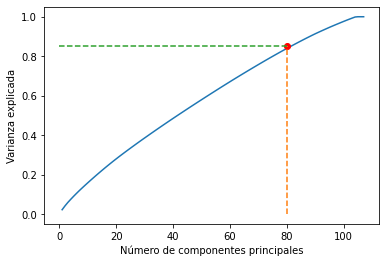

In [16]:
X = df
if (X.shape[1] < 39) and (PCA_active):

  pca = PCA(X.shape[1]-1).fit(X)
  xx = np.arange(1, X.shape[1], step=1)
  yy = np.cumsum(pca.explained_variance_ratio_)
  plt.plot(xx, yy)
  plt.plot(25,0.87, 'ro')
  plt.plot([25,25],[0.0,0.87], linestyle='--')
  plt.plot([0,25],[.87,0.87], linestyle='--')
  plt.xlabel('Número de componentes principales')
  plt.ylabel('Varianza explicada')
  X = PCA(24).fit_transform(X)

elif PCA_active:
  pca = PCA(X.shape[1]-1).fit(X)
  plt.figure(figsize=(6,4))
  xx = np.arange(1, X.shape[1], step=1)
  yy = np.cumsum(pca.explained_variance_ratio_)
  plt.plot(xx, yy)
  plt.plot(80,0.85, 'ro')
  plt.plot([80,80],[0.0,0.85], linestyle='--')
  plt.plot([0,80],[.85,0.85], linestyle='--')
  plt.xlabel('Número de componentes principales')
  plt.ylabel('Varianza explicada')
  X = PCA(80).fit_transform(X)  

X.shape  

# Clustering

In [25]:
def plot_3D(X, labels):
    ## Para verlo en 3D
    pca = PCA(n_components = 3)
    X_pca = pca.fit_transform(X)
    ax = plt.axes(projection='3d')

    ax.scatter3D(X_pca[:,0],X_pca[:,1],X_pca[:,2],marker="o",c= labels,  cmap=plt.cm.nipy_spectral)
    ax.set_xticks([-0.5, 0, 0.9])
    plt.show()


## KMEANS

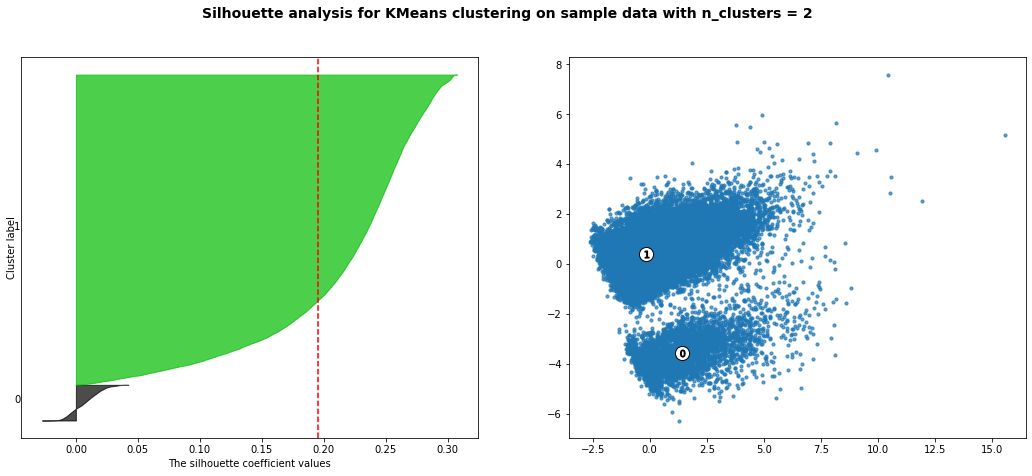

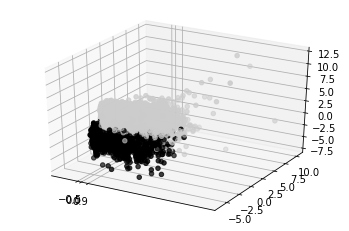

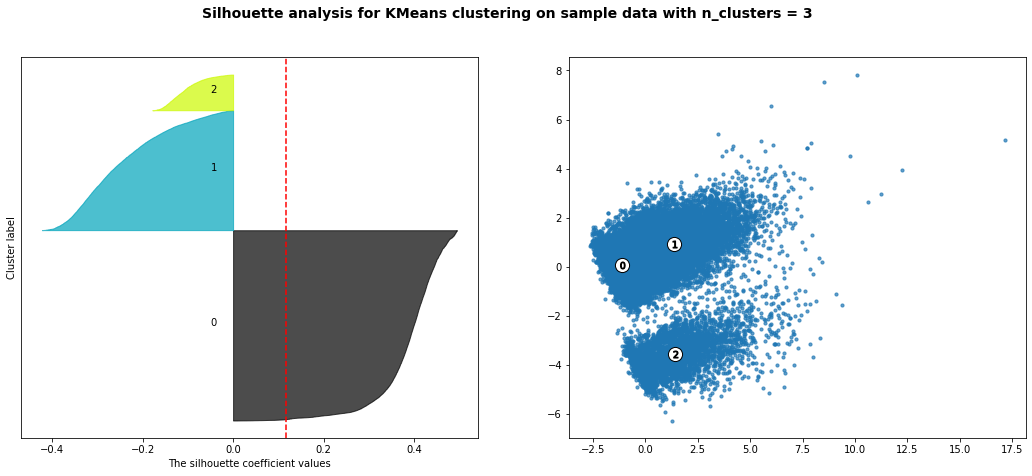

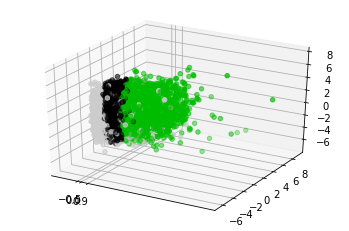

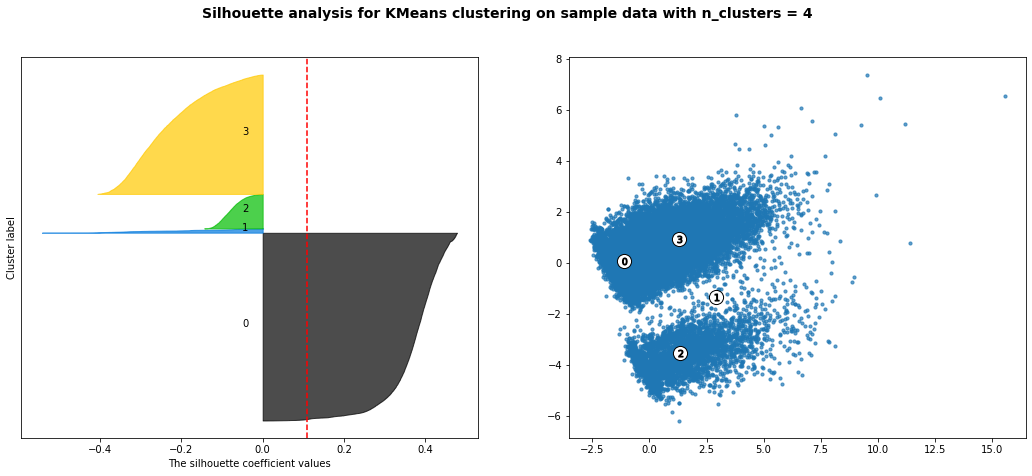

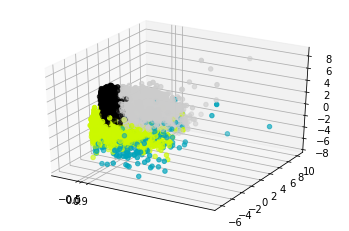

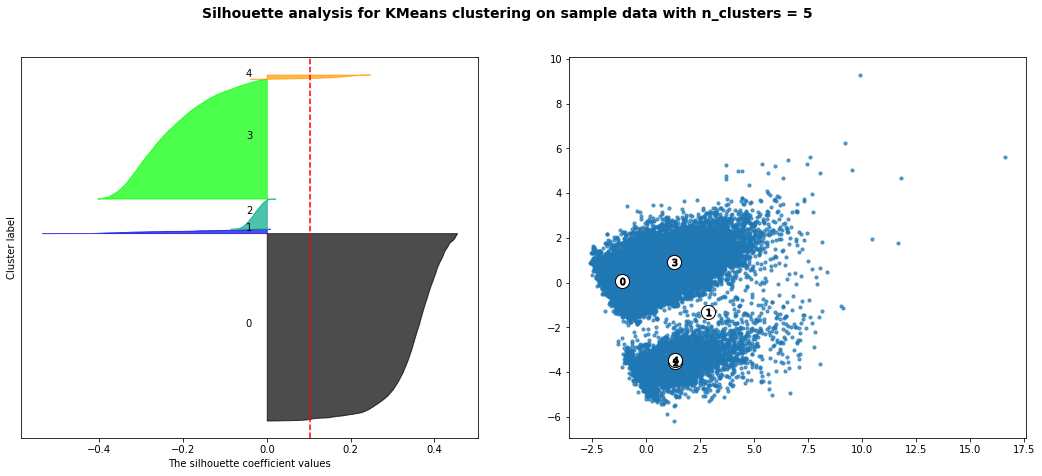

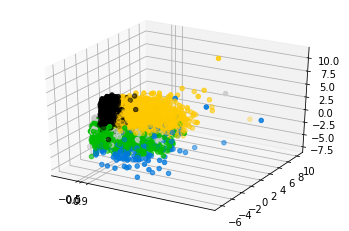

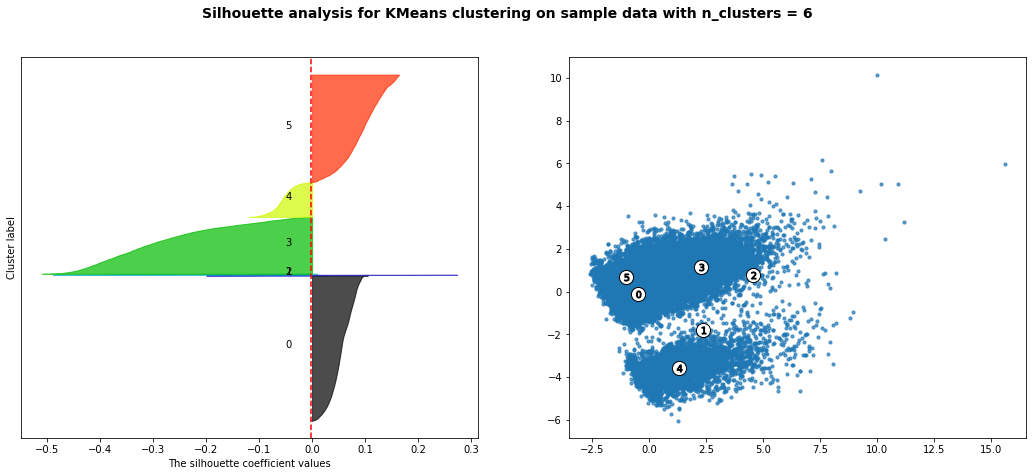

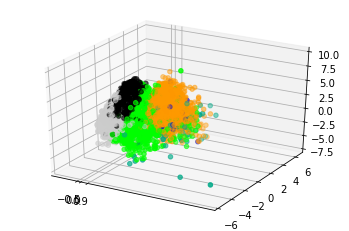

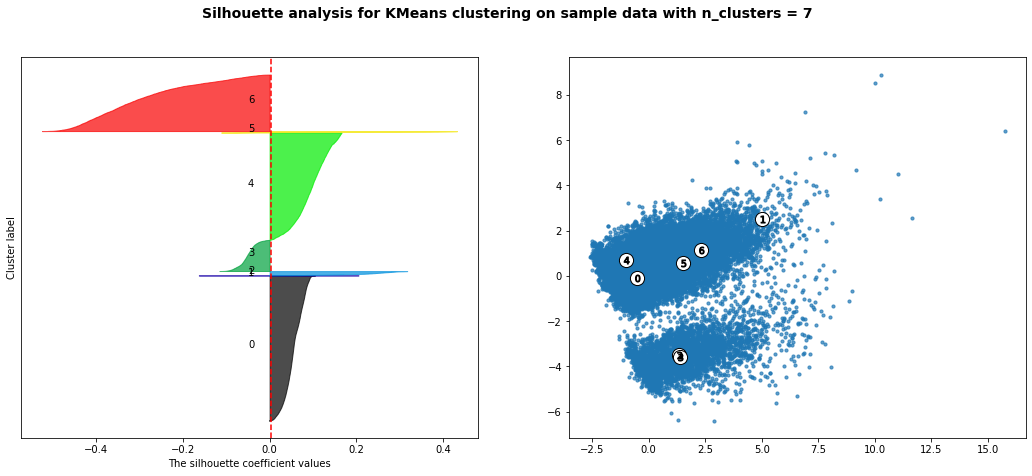

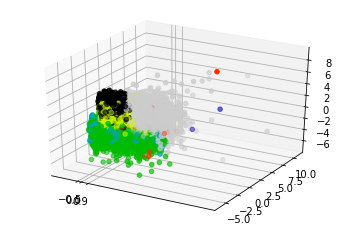

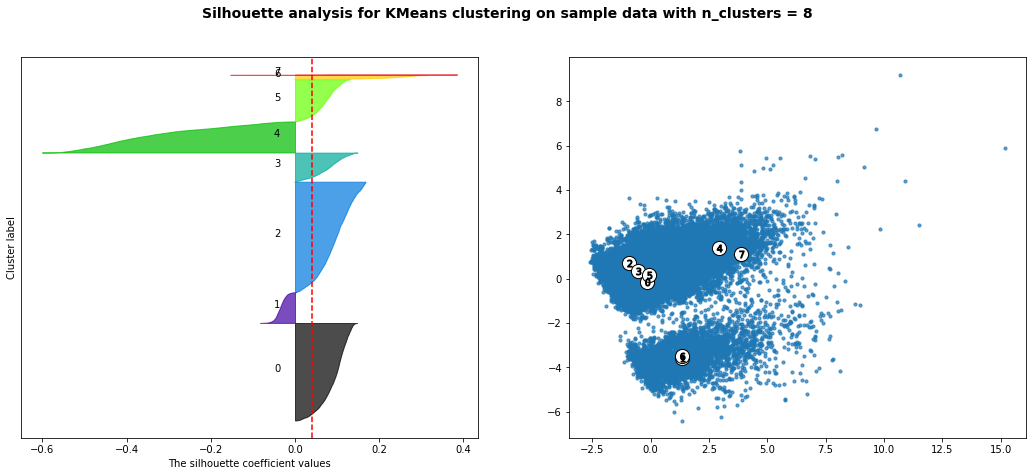

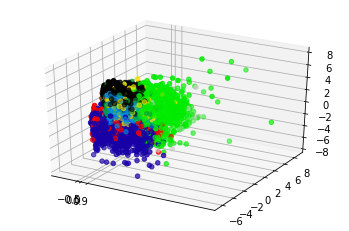

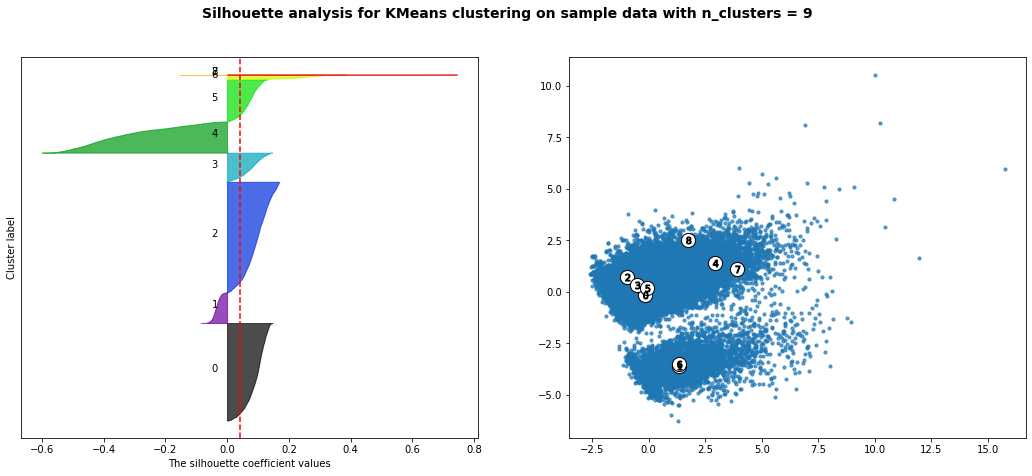

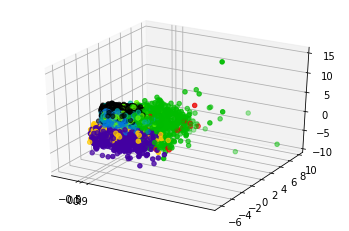

In [32]:
for n_clusters in range(2,10):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_yticks([])

    model =  KMeans(n_clusters=n_clusters, n_init=100, random_state=4533)
    labels = model.fit_predict(X)

    silhouette_avg = silhouette_score(X, labels)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    pca = PCA(n_components = 2)
    X_pca = pca.fit_transform(X)
    ax2.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10)
    
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_ylabel("Cluster label")


    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    centers = model.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')
    plt.show()
    plot_3D(X, labels)

## DBSCAN

In [44]:
number_of_rows = int(X.shape[0]/2)

random_indices = np.random.choice(number_of_rows,size=number_of_rows)

half_X = X[random_indices,:]

In [48]:
X.shape

(40425, 80)

In [ ]:
half_X.shape

In [ ]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=10, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
if n_clusters_>1:
  print("Silhouette Coefficient: %0.3f"  % silhouette_score(X, db.labels_))

# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each)          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (db.labels_ == k)


    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Aglomerative




In [ ]:
for n_clusters in range(2,5):
    print("Cluster", n_clusters)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    model =  AgglomerativeClustering(n_clusters=n_clusters)
    model.fit(X)

    silhouette_avg = silhouette_score(X, model.labels_)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, model.labels_)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[model.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    pca = PCA(n_components = 2)

    ax2.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10)
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")

    plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')


    plt.show()

Cluster 2
